# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Rozagi]
- **Email:** [muhammadrozagi09@gmail.com]
- **ID Dicoding:** [rzgiii09]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap rata rata jumlah peminjaman sepeda?
- Bagaimana pengaruh cuaca terhadap rata rata jumlah peminjaman sepeda ?
- Bagaimana dampak kelembapan dan kecepatan angin terhadap rata rata peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_hour = pd.read_csv("/content/drive/MyDrive/Dataset_Bike/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset df_hour ini berisi data peminjaman sepeda per jam, mencatat berbagai faktor yang dapat memengaruhi jumlah peminjaman. Data mencakup informasi waktu (tanggal, jam, hari kerja/libur), kondisi cuaca (musim, suhu, kelembapan, kecepatan angin), serta jumlah peminjaman dari pengguna terdaftar dan tidak terdaftar. Dataset ini berguna untuk menganalisis pola peminjaman berdasarkan waktu dan faktor eksternal.

In [4]:
df_day = pd.read_csv("/content/drive/MyDrive/Dataset_Bike/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset df_day mencatat jumlah peminjaman sepeda harian dengan variabel waktu (tanggal, musim, hari kerja/libur), kondisi cuaca (suhu, kelembapan, kecepatan angin), serta jumlah pengguna kasual dan terdaftar. Data ini dapat digunakan untuk menganalisis pola peminjaman berdasarkan faktor waktu dan cuaca.

### Assessing Data

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Data terlihat normal namun ada keanehan pada salah satu tipe data dari data dteday yang harusnya bertipe data datetime. Ini akan dibersihkan saat pada data cleaning

In [6]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Kode di atas merupakan kode untuk memeriksa apakah sebuah data itu terdapat missing values. Hasilnya menunjukkan bahwa dataset tidak memiliki data yang hilang di semua kolom. Ini berarti tidak perlu melakukan imputasi atau pembersihan data tambahan.

In [7]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Kode di atas merupakan kode untuk memeriksa apakah sebuah data itu terdapat duplicated value. Hasilnya menunjukkan bahwa dataset tidak memiliki data yang terduplikasi.

In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Data terlihat normal, tidak terlihat ada nya keanehan pada dataset.

In [9]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Sama seperti df_day pada dataset ini juga tipe data dari dtedaynya masih menggunakan object yang mana ini harus diubah jadi datetime saat data cleaning


In [10]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Kode di atas merupakan kode untuk memeriksa apakah sebuah data itu terdapat missing values. Hasilnya menunjukkan bahwa dataset tidak memiliki data yang hilang di semua kolom. Ini berarti tidak perlu melakukan imputasi atau pembersihan data tambahan.

In [11]:
print("Jumlah duplikasi: ",df_hour.duplicated().sum())
df_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terlihat bahwa dataset df_hour tidak terdapat data yang terduplikasi. Struktur data juga tidak memiliki keanehan dan siap untuk diolah

### Cleaning Data

In [12]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

**Insight:**
- Mengubah tipe data dari dteday yang sebelumnya object menjadi datetime.

In [13]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- Mengubah tipe data dari dteday yang sebelumnya object menjadi datetime.

In [14]:

df_day.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "cnt": "total_count"
}, inplace=True)

**Insight:**
- Agar terlihat lebih jelas, beberapa nama kolom diubah menjadi nama yang lebih mudah dipahami.


## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
df_day.describe(include='all')

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- kita dapat melihat beberapa indikasi awal terkait pengaruh musim, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepeda. Rata-rata peminjaman sepeda per hari adalah 4.504 sepeda, dengan variasi yang cukup tinggi, mulai dari 22 hingga 8.714 sepeda. Dari nilai rata-rata pada kolom season, terlihat bahwa musim gugur (fall) mungkin memiliki jumlah peminjaman yang lebih tinggi dibandingkan musim lainnya. Hal ini bisa terjadi karena kondisi cuaca yang lebih bersahabat dibandingkan musim panas yang terlalu panas atau musim dingin yang terlalu dingin.

In [16]:

weather_labels = {
    1: "Cerah",
    2: "Mendung",
    3: "Hujan ringan",
    4: "Hujan lebat"
}
df_day["weather_label"] = df_day["weathersit"].map(weather_labels)
df_day[["weathersit", "weather_label"]].head()


,weathersit,weather_label
0,2,Mendung
1,2,Mendung
2,1,Cerah
3,1,Cerah
4,1,Cerah


Insight:
- Pada weather ditambahkan sebuah variabel baru yaitu weather_labels untuk memperjelas keterangan dari weathernya




In [17]:
df_day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count,weather_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Mendung
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Mendung
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah


insight:
- Terlihat bahwa label sudah ada pada tabel data.

In [18]:
df_day['total_count'].describe()

,total_count
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


In [19]:
df_weather = df_day.groupby("weathersit")["total_count"].agg(["mean", "median", "std", "min", "max"])
df_weather

,mean,median,std,min,max
weathersit,,,,,
1,4876.786177,4844.0,1879.483989,431,8714
2,4035.862348,4040.0,1809.109918,605,8362
3,1803.285714,1817.0,1240.284449,22,4639


Insight:
- Cuaca cerah (weathersit = 1) memiliki rata-rata peminjaman tertinggi sekitar 4876 sepeda per hari, dengan maksimum mencapai 8714 sepeda.
- Cuaca berkabut atau berawan (weathersit = 2) menurunkan jumlah peminjaman menjadi sekitar 4035 sepeda per hari.
- Hujan ringan atau salju ringan (weathersit = 3) berdampak signifikan menurunkan jumlah peminjaman menjadi 1803 sepeda per hari, yang jauh lebih rendah dibandingkan kondisi cerah.
- Semakin buruk cuaca, semakin rendah jumlah peminjaman sepeda, menunjukkan bahwa cuaca sangat memengaruhi keputusan pengguna untuk menggunakan sepeda.

In [20]:
df_weather = df_weather.merge(df_day[['weathersit', 'weather_label']], on='weathersit', how='left').drop_duplicates()

In [21]:
df_season = df_day.groupby("season")["total_count"].agg(["mean", "median", "std", "min", "max"])
df_season

,mean,median,std,min,max
season,,,,,
1,2604.132597,2209.0,1399.942119,431,7836
2,4992.331522,4941.5,1695.977235,795,8362
3,5644.303191,5353.5,1459.800381,1115,8714
4,4728.162921,4634.5,1699.615261,22,8555


**Insight:**
- Peminjaman sepeda tertinggi terjadi di musim panas (5644) dan tetap tinggi di musim gugur (4728). Musim semi (4992) juga menunjukkan peningkatan dibanding musim dingin (2604) yang memiliki jumlah peminjaman terendah. Cuaca yang lebih hangat cenderung meningkatkan aktivitas bersepeda

In [22]:
df_day[['total_count', 'hum', 'windspeed']].corr()

,total_count,hum,windspeed
total_count,1.000000,-0.100659,-0.234545
hum,-0.100659,1.000000,-0.248489
windspeed,-0.234545,-0.248489,1.000000


**Insight:**
- Kelembapan (hum) memiliki korelasi negatif lemah (-0.10) dengan jumlah peminjaman sepeda. Dampak kecil, tetapi kelembapan tinggi sedikit mengurangi peminjaman.

- Kecepatan angin (windspeed) memiliki korelasi negatif sedang (-0.23). Dampak lebih signifikan, angin kencang membuat orang enggan bersepeda.

In [23]:
df_month = df_day.groupby("month")["total_count"].mean()
df_weekday = df_day.groupby("weekday")["total_count"].mean()

print("Rata-rata peminjaman per bulan:\n", df_month)
print("\nRata-rata peminjaman per hari dalam seminggu:\n", df_weekday)

Rata-rata peminjaman per bulan:
 month
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: total_count, dtype: float64

Rata-rata peminjaman per hari dalam seminggu:
 weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: total_count, dtype: float64


**Insight:**
- Peminjaman sepeda cenderung meningkat selama pertengahan tahun, dengan puncaknya di bulan Juni (5772) dan tetap tinggi hingga September (5199), mencerminkan cuaca yang lebih mendukung. Peminjaman lebih rendah di awal dan akhir tahun.
Secara harian, peminjaman lebih tinggi pada hari kerja (terutama Selasa-Kamis), menunjukkan bahwa banyak pengguna memakai sepeda untuk aktivitas rutin seperti bekerja atau sekolah.

In [24]:
df_hour['hr'].describe()

,hr
count,17379.000000
mean,11.546752
std,6.914405
min,0.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,23.000000


## Visualization & Explanatory Analysis
- Bagaimana pengaruh musim terhadap rata rata jumlah peminjaman sepeda?
- Bagaimana pengaruh cuaca terhadap rata rata jumlah peminjaman sepeda ?
- Bagaimana dampak kelembapan dan kecepatan angin terhadap rata rata peminjaman
  sepeda?
- Bagaimana pola peminjaman sepeda berdasarkan waktu?

### Pertanyaan 1:

<ipython-input-25-293d9ee3c97a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


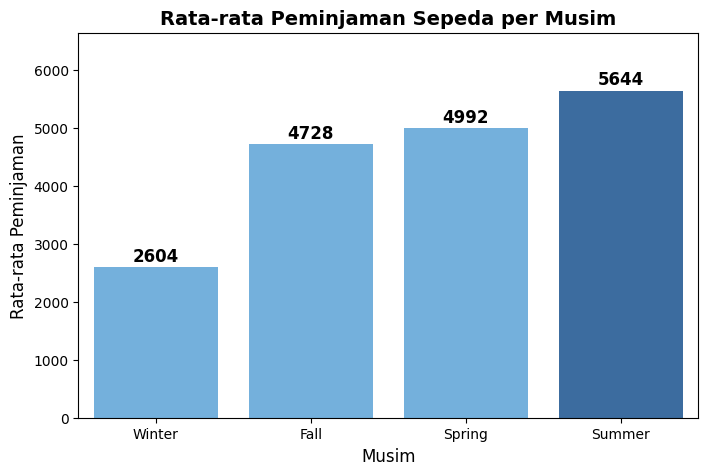

In [25]:
df_season = df_day.groupby("season")["total_count"].mean().reset_index()

season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
df_season["season_label"] = df_season["season"].map(season_labels)

df_season = df_season.sort_values(by="total_count", ascending=True)

colors = ["#63b3ed"] * (len(df_season) - 1) + ["#2b6cb0"]

plt.figure(figsize=(8,5))
bar = sns.barplot(
    x="season_label",
    y="total_count",
    data=df_season,
    palette=colors
)

plt.title("Rata-rata Peminjaman Sepeda per Musim", fontsize=14, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.ylim(0, df_season["total_count"].max() + 1000)

for i, row in enumerate(df_season.itertuples()):
    plt.text(i, row.total_count + 100, int(row.total_count), ha="center", fontsize=12, fontweight="bold")

plt.show()


**Insight:**
**Bagaimana Musim Mempengaruhi Peminjaman Sepeda?**
- Dari grafik, kita bisa melihat bahwa jumlah peminjaman sepeda berubah-ubah tergantung musim. Musim panas (Summer) menjadi puncak peminjaman dengan rata-rata sekitar 5644 peminjaman, diikuti oleh musim semi (Spring) dan musim gugur (Fall) yang angkanya cukup dekat, yaitu 4992 dan 4728 peminjaman. Sebaliknya, musim dingin (Winter) mencatat angka terendah, hanya 2604 peminjaman.

**Kenapa musim panas lebih ramai?**
- Ada beberapa alasan yang bisa menjelaskan tren ini. Musim panas punya cuaca yang lebih nyaman untuk bersepeda, dengan suhu yang lebih hangat dan siang yang lebih panjang, membuat orang lebih sering keluar rumah. Sebaliknya, di musim dingin, udara yang lebih dingin atau bahkan bersalju bisa bikin orang malas atau merasa tidak aman untuk bersepeda.

### Pertanyaan 2:

<ipython-input-26-f7df9e05c1a0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


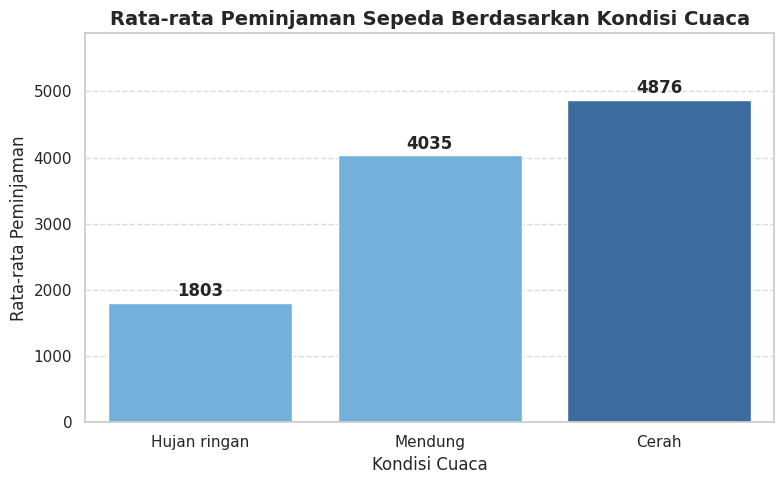

In [26]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

df_weather = df_weather.sort_values(by="mean", ascending=True)

colors = ["#63b3ed"] * (len(df_weather) - 1) + ["#2b6cb0"]

ax = sns.barplot(
    x="weather_label",
    y="mean",
    data=df_weather,
    palette=colors,

)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca", fontsize=14, fontweight='bold')
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.ylim(0, df_weather["mean"].max() + 1000)

for i, row in enumerate(df_weather.itertuples()):
    plt.text(i, row.mean + 100, int(row.mean), ha="center", fontsize=12, fontweight="bold")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Bagaimana Kondisi Cuaca Mempengaruhi Peminjaman Sepeda?**
- Grafik ini menunjukkan bahwa kondisi cuaca memiliki pengaruh besar terhadap jumlah peminjaman sepeda. Saat cuaca cerah, peminjaman mencapai angka tertinggi, yaitu 4876 peminjaman. Hal ini masuk akal karena cuaca yang baik membuat orang lebih nyaman dan aman untuk bersepeda.

- Ketika cuaca mendung, jumlah peminjaman menurun menjadi 4035, meskipun masih cukup tinggi. Ini menunjukkan bahwa banyak orang tetap menggunakan sepeda meskipun langit tidak sepenuhnya cerah.

- Sebaliknya, hujan ringan menyebabkan penurunan signifikan dalam peminjaman, hanya 1803 peminjaman. Hujan mungkin membuat jalanan licin dan kurang nyaman untuk bersepeda, sehingga banyak orang memilih moda transportasi lain.

### Pertanyaan 3:

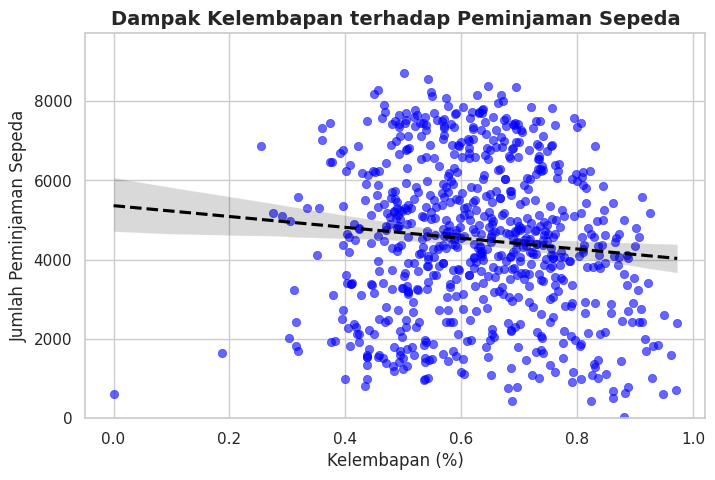

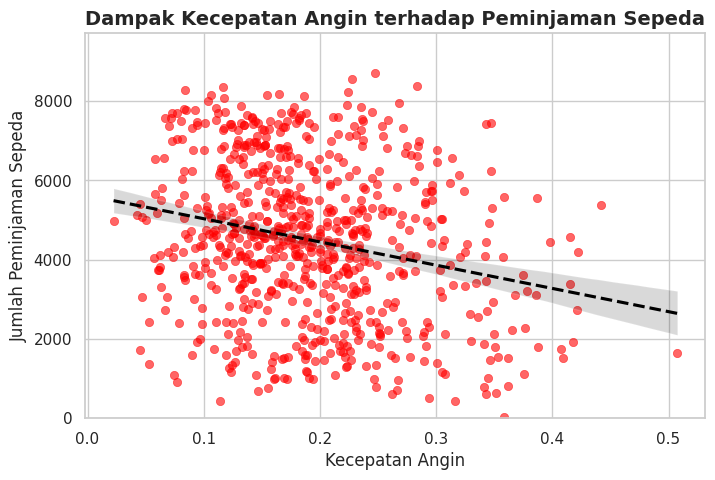

In [27]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_day["hum"], y=df_day["total_count"], alpha=0.6, color="blue", edgecolor=None)
sns.regplot(x=df_day["hum"], y=df_day["total_count"], scatter=False, color="black", line_kws={"linestyle":"dashed"})
plt.title("Dampak Kelembapan terhadap Peminjaman Sepeda", fontsize=14, fontweight="bold")
plt.xlabel("Kelembapan (%)", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.ylim(0, df_day["total_count"].max() + 1000)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_day["windspeed"], y=df_day["total_count"], alpha=0.6, color="red", edgecolor=None)
sns.regplot(x=df_day["windspeed"], y=df_day["total_count"], scatter=False, color="black", line_kws={"linestyle":"dashed"})
plt.title("Dampak Kecepatan Angin terhadap Peminjaman Sepeda", fontsize=14, fontweight="bold")
plt.xlabel("Kecepatan Angin", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.ylim(0, df_day["total_count"].max() + 1000)
plt.show()


**Kelembapan Mempengaruhi Peminjaman Sepeda, Tapi Tidak signifikan**

- Scatter plot menunjukkan hubungan negatif lemah, di mana semakin tinggi kelembapan, jumlah peminjaman sepeda cenderung sedikit menurun.
Namun, data tersebar luas, menunjukkan bahwa kelembapan bukan satu-satunya faktor utama dalam menentukan jumlah peminjaman.

**Kecepatan Angin Memiliki Dampak Negatif, Tapi Tidak Drastis**
- Garis tren menunjukkan bahwa semakin tinggi kecepatan angin, jumlah peminjaman cenderung menurun.
Namun, distribusi titik data menunjukkan banyak peminjaman masih terjadi meskipun angin bertiup cukup kencang, menandakan bahwa angin hanya memberikan pengaruh kecil hingga sedang terhadap jumlah peminjaman.

### Pertanyaan 4:

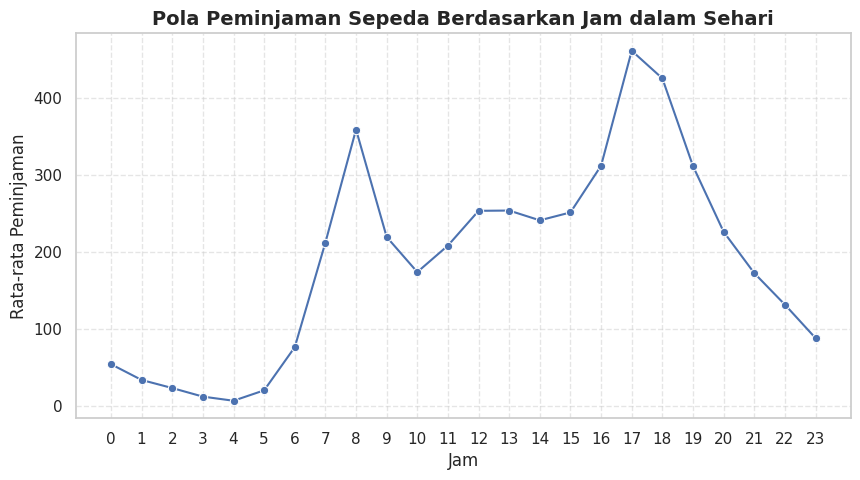

In [28]:

df_hourly = df_hour.groupby("hr")["cnt"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="hr", y="cnt", data=df_hourly, marker="o", color="b")

plt.title("Pola Peminjaman Sepeda Berdasarkan Jam dalam Sehari", fontsize=14, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**Insight**
- Grafik menunjukkan pola peminjaman sepeda yang jelas dalam sehari. Terlihat dua puncak utama pada pukul 07.00 dan 17.00, yang kemungkinan besar bertepatan dengan jam berangkat dan pulang kerja atau sekolah. Peminjaman sepeda mulai meningkat dari pukul 05.00, mencapai puncak sekitar pukul 07.00 dengan lebih dari 350 peminjaman, lalu menurun setelahnya. Pada siang hari, peminjaman cenderung stabil di kisaran 200–250 sebelum kembali meningkat menjelang sore. Puncak tertinggi terjadi pada pukul 17.00 dengan lebih dari 400 peminjaman, sebelum akhirnya menurun drastis setelah pukul 19.00. Pola ini mengindikasikan bahwa sepeda banyak digunakan untuk keperluan transportasi saat jam sibuk.

**Clustering tanpa Machine Learning (Rule-Based Segmentation)**


In [29]:
def categorize_usage(x):
    if x < 2000:
        return "Low Usage"
    elif x < 5000:
        return "Medium Usage"
    else:
        return "High Usage"

df_day["Usage_Category"] = df_day["total_count"].apply(categorize_usage)


df_day["Usage_Category"].value_counts()


,count
Usage_Category,
Medium Usage,347
High Usage,286
Low Usage,98


**Insight**:
- Sebagian besar peminjaman sepeda berada di kategori sedang (347 kali), lalu diikuti oleh peminjaman tinggi (286 kali). Sementara itu, peminjaman rendah terjadi paling sedikit (98 kali). Ini menunjukkan bahwa orang lebih sering meminjam sepeda dalam jumlah sedang hingga banyak.

## Conclusion

###Conclution pertanyaan 1
Musim memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Peminjaman paling tinggi terjadi pada musim panas, kemungkinan karena cuaca yang lebih hangat dan durasi siang yang lebih panjang, sehingga lebih nyaman untuk bersepeda. Sebaliknya, peminjaman menurun drastis di musim dingin, kemungkinan disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung. Hal ini menunjukkan bahwa faktor cuaca sangat memengaruhi pola penggunaan sepeda.

- Musim panas menjadi periode dengan jumlah peminjaman sepeda tertinggi. Cuaca yang hangat dan siang yang lebih panjang membuat orang lebih nyaman untuk bersepeda, baik untuk keperluan sehari-hari maupun rekreasi.

- Sebaliknya, musim dingin mencatat jumlah peminjaman terendah. Suhu yang dingin serta kemungkinan hujan atau salju membuat orang cenderung menghindari penggunaan sepeda.

- Data menunjukkan bahwa kondisi cuaca sangat memengaruhi pola peminjaman sepeda. Musim dengan cuaca yang lebih bersahabat cenderung meningkatkan jumlah pengguna sepeda.

###Conlcution pertanyaan 2


Kondisi cuaca berpengaruh besar terhadap peminjaman sepeda. Saat cuaca cerah, peminjaman mencapai 4876, karena kondisi yang nyaman dan aman. Saat mendung, jumlahnya turun menjadi 4035, menunjukkan masih banyak yang tetap bersepeda. Namun, saat hujan ringan, peminjaman anjlok ke 1803, kemungkinan karena jalanan licin dan kurang nyaman.
- Cuaca cerah mendorong peminjaman sepeda lebih tinggi, karena kondisi yang nyaman dan aman membuat lebih banyak orang memilih bersepeda.

- Cuaca mendung masih memungkinkan banyak orang untuk bersepeda, meskipun jumlah peminjaman sedikit berkurang dibandingkan saat cuaca cerah.

- Hujan ringan secara signifikan mengurangi peminjaman sepeda, kemungkinan karena jalanan yang licin dan kondisi yang kurang nyaman untuk bersepeda.

Jadi dapat disimpulkan bahwa cuaca sangat berpengaruh terhadap peminjaman sepeda.

###Conclution pertanyaan 3


- Kelembapan dan kecepatan angin memang berpengaruh terhadap jumlah peminjaman sepeda, tetapi dampaknya tidak terlalu signifikan. Kelembapan yang tinggi cenderung sedikit menurunkan jumlah peminjaman, tetapi data yang tersebar luas menunjukkan bahwa faktor ini bukanlah penentu utama. Sementara itu, kecepatan angin yang lebih tinggi juga berdampak pada penurunan peminjaman, tetapi pengaruhnya tidak drastis, karena banyak orang masih tetap menggunakan sepeda meskipun angin cukup kencang.

###Conclution pertanyaan 4


- Pola peminjaman sepeda menunjukkan dua puncak utama, yaitu pada pukul 07.00 dan 17.00. Hal ini mengindikasikan bahwa sepeda banyak digunakan sebagai alat transportasi untuk perjalanan ke dan dari tempat kerja atau sekolah. Di antara jam-jam tersebut, terutama dari pukul 10.00 hingga 15.00, jumlah peminjaman relatif stabil di kisaran 200–250, yang kemungkinan besar mencerminkan penggunaan untuk keperluan santai atau aktivitas lain di luar jam sibuk. Namun, setelah pukul 19.00, jumlah peminjaman menurun drastis, menunjukkan bahwa sepeda lebih jarang digunakan di malam hari, mungkin karena faktor kenyamanan dan keamanan.